In [1]:
## import neccesary libraries
%pip install imblearn
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
## read the dataset using pandas
Bank_dataset= pd.read_csv('bank.csv', sep=";")

In [3]:
Bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


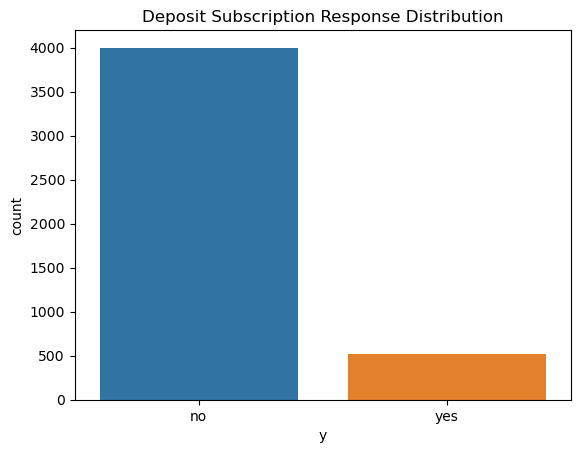

In [4]:
## explore the dependent variable to check class imbalance and distribution
sns.countplot(x="y", data = Bank_dataset)
plt.title('Deposit Subscription Response Distribution')
plt.show()

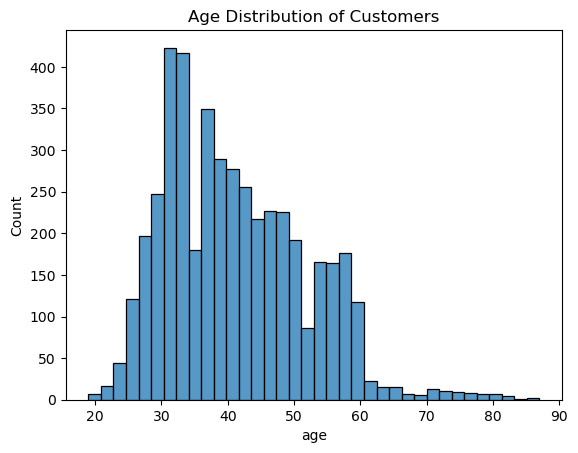

In [5]:
## Visualise age distribution of Customers
sns.histplot(x="age", data = Bank_dataset)
plt.title('Age Distribution of Customers')
plt.show()

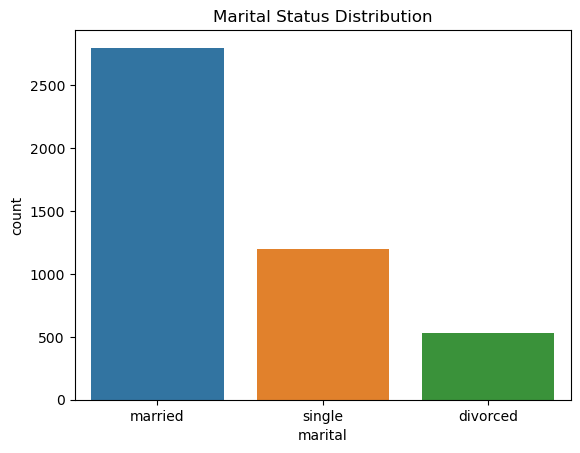

In [6]:
# visualise marital status distribution of customers
sns.countplot(x="marital", data = Bank_dataset)
plt.title('Marital Status Distribution')
plt.show()

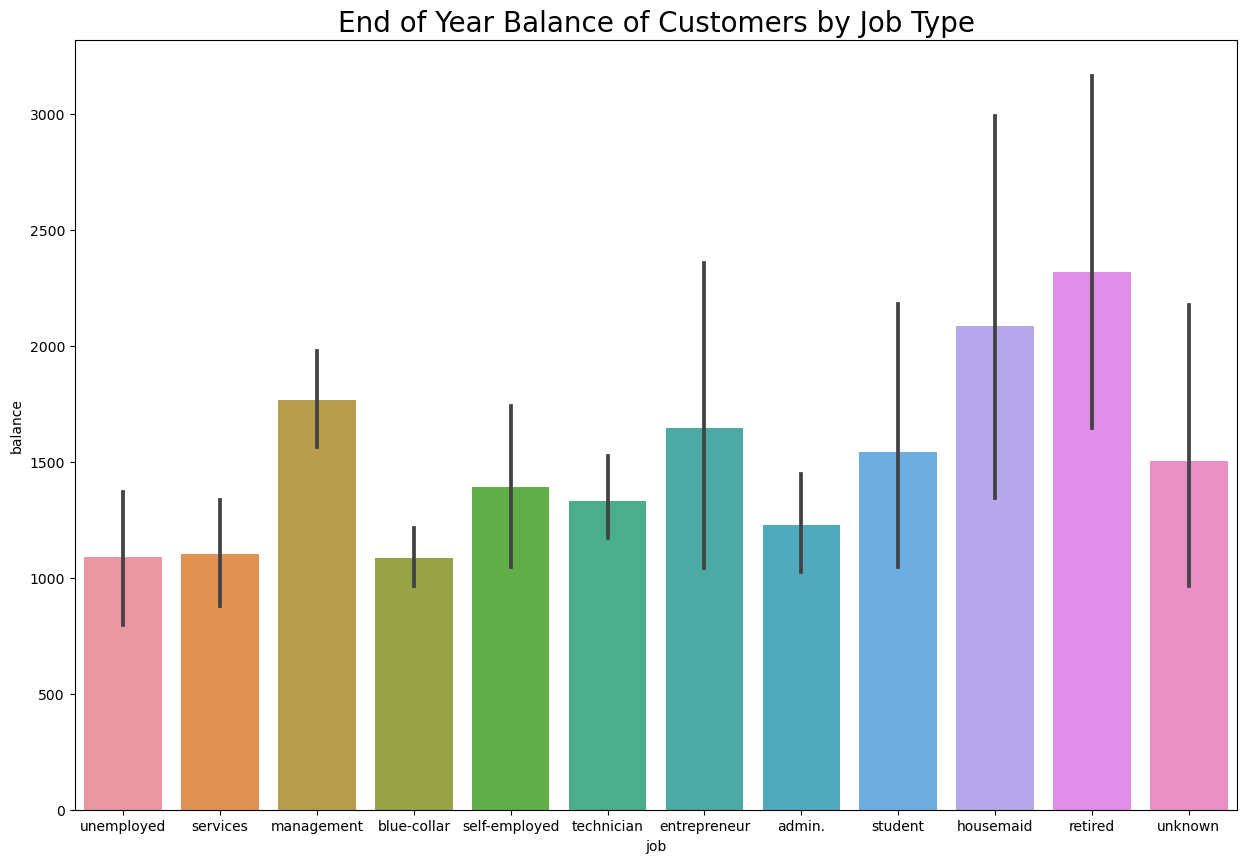

In [7]:
# Visualise a plot of End of Year Balance of Customers by Job Type
fig, ax1 = plt.subplots(figsize=(15, 10))
sns.barplot(data=Bank_dataset, x='job', y='balance',ax=ax1)
plt.title('End of Year Balance of Customers by Job Type', fontsize=20)
plt.show()

In [8]:
## view data info to identify data types and missing values or null values
Bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
#rename the class label colunm y to deposit
Bank_dataset.rename(columns = {'y':'Deposit'}, inplace = True)
Bank_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [10]:
#view the statistical description summary of the data in the dataframe
Bank_dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [11]:
## check for unique values for each column
print(Bank_dataset.nunique())

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
Deposit         2
dtype: int64


In [12]:
## Convert all columns that are categorical to numerical variable
Bank_dataset["job"]=Bank_dataset["job"].replace(["admin.","blue-collar","entrepreneur","housemaid","management","retired","student","self-employed","services","technician","unknown","unemployed"], [0,1,2,3,4,5,6,7,8,9,10,11])
Bank_dataset["marital"]=Bank_dataset["marital"].replace(["single","married","divorced"],[0,1,2])
Bank_dataset["education"]=Bank_dataset["education"].replace(["primary","secondary","tertiary","unknown"],[0,1,2,3])
Bank_dataset["default"]=Bank_dataset["default"].replace(["no","yes"],[0,1])
Bank_dataset["housing"]=Bank_dataset["housing"].replace(["no","yes"],[0,1])
Bank_dataset["loan"]=Bank_dataset["loan"].replace(["no","yes"],[0,1])
Bank_dataset["contact"]=Bank_dataset["contact"].replace(["unknown","telephone","cellular"],[0,1,2])
Bank_dataset["month"]=Bank_dataset["month"].replace(["jan", "feb", "mar", "apr","may","jun","jul","aug","sep","oct","nov","dec"],[0,1,2,3,4,5,6,7,8,9,10,11])
Bank_dataset["poutcome"]=Bank_dataset["poutcome"].replace(["failure","success","unknown","other"],[0,1,2,3])
Bank_dataset["Deposit"]=Bank_dataset["Deposit"].replace(["no","yes"],[0,1])

In [13]:
Bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Deposit
0,30,11,1,0,0,1787,0,0,2,19,9,79,1,-1,0,2,0
1,33,8,1,1,0,4789,1,1,2,11,4,220,1,339,4,0,0
2,35,4,0,2,0,1350,1,0,2,16,3,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,0,3,5,199,4,-1,0,2,0
4,59,1,1,1,0,0,1,0,0,5,4,226,1,-1,0,2,0


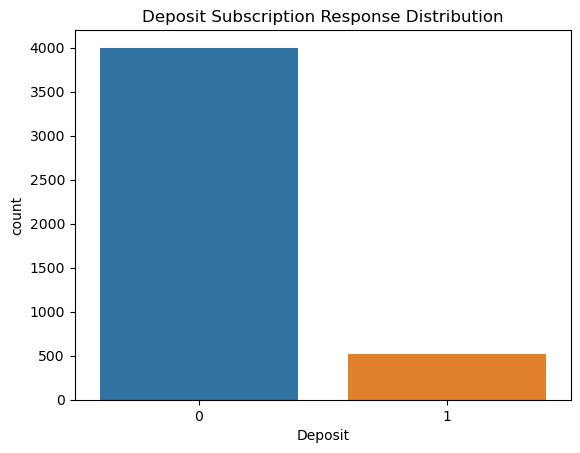

In [14]:
sns.countplot(x="Deposit", data = Bank_dataset)
plt.title('Deposit Subscription Response Distribution')
plt.show()

In [15]:
## Define independent and dependent variable as X and y
X= Bank_dataset.drop("Deposit", axis = 1)
y= Bank_dataset["Deposit"]

In [16]:
## Split and standardize dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size= 0.2, random_state=0, stratify=y)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

<Axes: xlabel='Deposit', ylabel='count'>

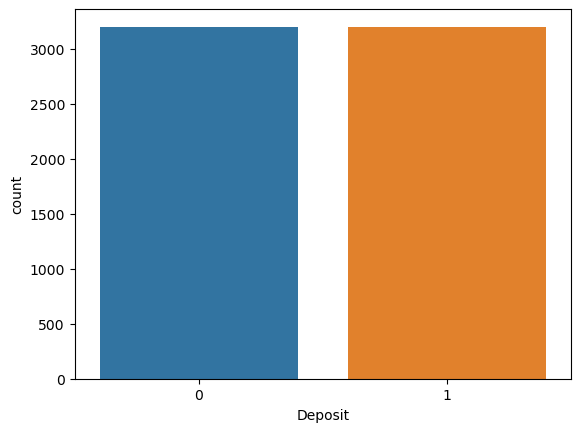

In [17]:
# Resample imbalanced dataset for training using RandomOversampler
import imblearn
from imblearn.over_sampling import RandomOverSampler
resampler= RandomOverSampler(random_state=0)
X_trained_oversampled,y_trained_oversampled= resampler.fit_resample(X_train,y_train)


sns.countplot(x=y_trained_oversampled)

In [18]:
## apply feature selection algorithm using Recursive Feature Elimination with Cross Validation (RFECV), LogisticRegression as extimator and StratifiedKFold as cross validation since Y is binary class

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
log=LogisticRegression()
rfecv = RFECV(log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy", step=6) ## step 6 was used to indicate number of features to remove at each iteration
X_train_cv = rfecv.fit_transform(X_trained_oversampled, y_trained_oversampled)
X_test_cv = rfecv.transform(X_test)
print(f"Number of remaining features: {X_train_cv.shape[1]}")

Number of remaining features: 10


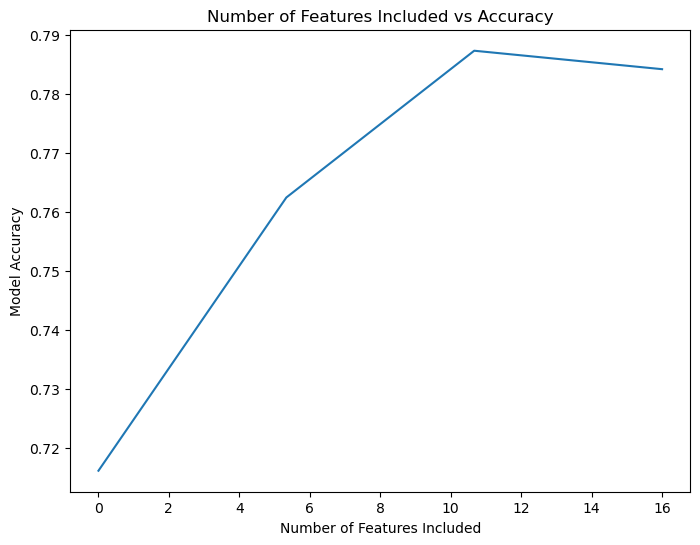

 Selected number of features:10


In [19]:
plt.figure( figsize=(8, 6))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
plt.plot(np.linspace(0,16,4), rfecv.cv_results_['mean_test_score'])
plt.show()
print(f" Selected number of features:{X_train_cv.shape[1]}")

In [20]:
## view the selected feature columns with support_ attribute to show with true or false columns that were selected based in column index
rfecv.support_

array([ True, False, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False])

In [21]:
## assign a variable to the new features dropping the un-informative features
Selected_features= X.iloc[:, rfecv.support_]

In [22]:
## view the list of selected features to see the colmn names
Selected_features.columns.tolist()

['age',
 'education',
 'balance',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous']

K at lowest model error= 0


Text(0, 0.5, 'Mean Error')

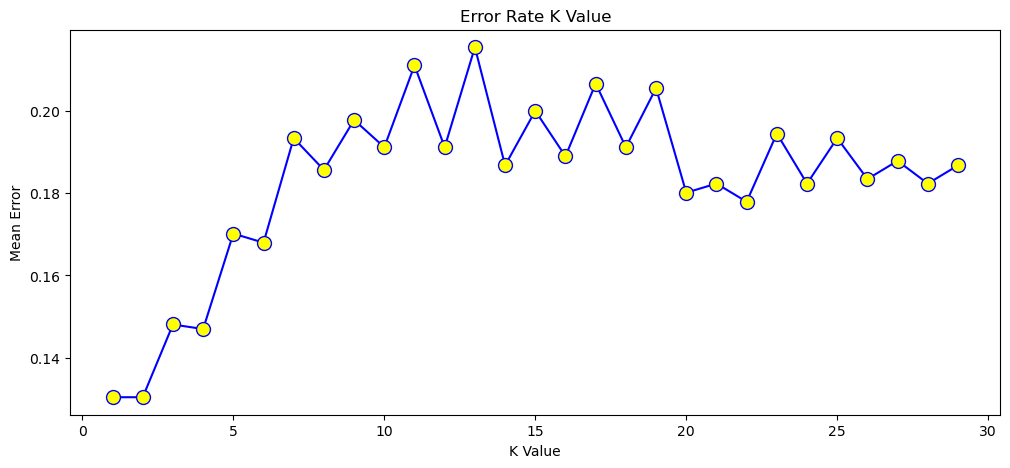

In [23]:
 #Determine the optimal value of K by iteratively testing various k values within the model  and select the one with the minimum error between predicted values and validated values
from sklearn.neighbors import KNeighborsClassifier
model_error = []
for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_trained_oversampled,y_trained_oversampled)
  pred_y = knn.predict(X_test)
  model_error.append(np.mean(pred_y != y_test))

print("K at lowest model error=",model_error.index(min(model_error)))
plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), model_error, color='blue', marker='o',
        markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

K at lowest model error2= 0


Text(0, 0.5, 'Mean Error')

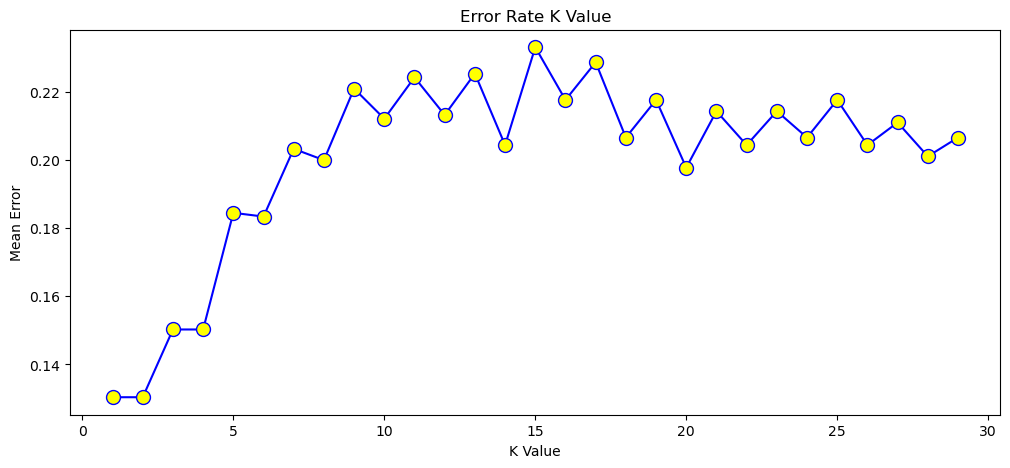

In [24]:
#Determine the optimal value of K by iteratively testing various k values after feature selection
from sklearn.neighbors import KNeighborsClassifier
model_error2 = []
for k in range(1,30):
 knn2 = KNeighborsClassifier(n_neighbors=k)
 knn2.fit(X_train_cv, y_trained_oversampled)
 pred_y2 = knn2.predict(X_test_cv)
 model_error2.append(np.mean(pred_y2 != y_test))

print("K at lowest model error2=",model_error2.index(min(model_error2)))


plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), model_error2, color='blue', marker='o',
        markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [25]:
## Fit the K_Nearest Neighbor (KNN) model using a specified number of neigbors, set at 21 before feauture selection

from sklearn import metrics
KNN = KNeighborsClassifier(n_neighbors = 21, metric = 'minkowski', p=2)
KNN.fit(X_trained_oversampled, y_trained_oversampled)

#make predictions with created model
y_pred = KNN.predict(X_test)

# Evalaute model metrics
score = metrics.accuracy_score(y_pred, y_test)
print ('Accuracy Result before feature selection: ', score)
score = metrics.precision_score(y_pred, y_test)
print ('Precision Result before feature selection: ', score)
score = metrics.recall_score(y_pred,y_test)
print ('Recall Result before feature selection: ', score)
score = metrics.f1_score(y_pred, y_test)
print ('F1 Result before feature selection: ', score)

Accuracy Result before feature selection:  0.8176795580110497
Precision Result before feature selection:  0.7307692307692307
Recall Result before feature selection:  0.3568075117370892
F1 Result before feature selection:  0.4794952681388012


In [26]:

##fit the knn model using a specified number of neighbor (35) on the selected features.

KNN2 = KNeighborsClassifier(n_neighbors = 35, metric = 'minkowski', p=2)
KNN2.fit(X_train_cv, y_trained_oversampled)
y_pred2 = KNN2.predict(X_test_cv)
score2 = metrics.accuracy_score(y_pred2, y_test)
print ('Accuracy Result after feature selection: ', score2)
score2 = metrics.precision_score(y_pred2, y_test)
print ('Precision Result after feature selection: ', score2)
score2 = metrics.recall_score(y_pred2, y_test)
print ('Recall Result after feature selection: ', score2)
score2 = metrics.f1_score(y_pred2, y_test)
print ('F1 Result after feature selection: ', score2)

Accuracy Result after feature selection:  0.8022099447513812
Precision Result after feature selection:  0.7403846153846154
Recall Result after feature selection:  0.33624454148471616
F1 Result after feature selection:  0.4624624624624625


In [27]:
# Evaluate model before feature selection with confusion matrix 
cm= metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(cm, '\n\n')
print('--------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

Confusion Matrix
[[664 137]
 [ 28  76]] 


--------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       801
           1       0.36      0.73      0.48       104

    accuracy                           0.82       905
   macro avg       0.66      0.78      0.68       905
weighted avg       0.89      0.82      0.84       905



In [28]:
# Evaluate model after feature selection with confusion matrix 
cm1= metrics.confusion_matrix(y_test,y_pred2)
print('Confusion Matrix')
print(cm1, '\n\n')
print('--------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred2)
print('Classification Report:\n')
print(result)

Confusion Matrix
[[649 152]
 [ 27  77]] 


--------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       801
           1       0.34      0.74      0.46       104

    accuracy                           0.80       905
   macro avg       0.65      0.78      0.67       905
weighted avg       0.89      0.80      0.83       905



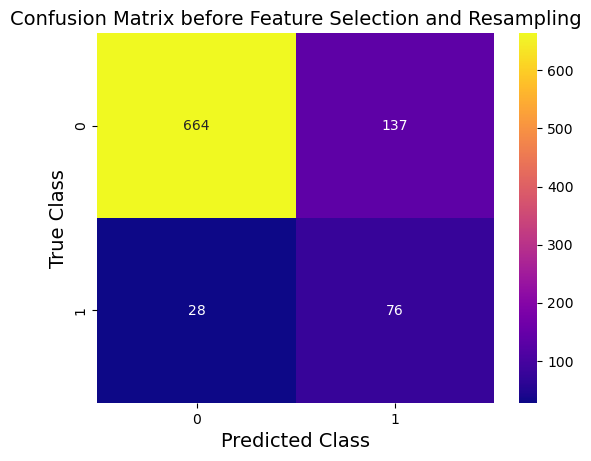

In [29]:
# plot confusion matrix before feature selection using heatmap
ax= sns.heatmap(cm, cmap = 'plasma', annot = True, fmt= 'd')
plt.xlabel("Predicted Class", fontsize = 14)
plt.ylabel("True Class", fontsize = 14)
plt.title("Confusion Matrix before Feature Selection and Resampling", fontsize = 14)
plt.show()

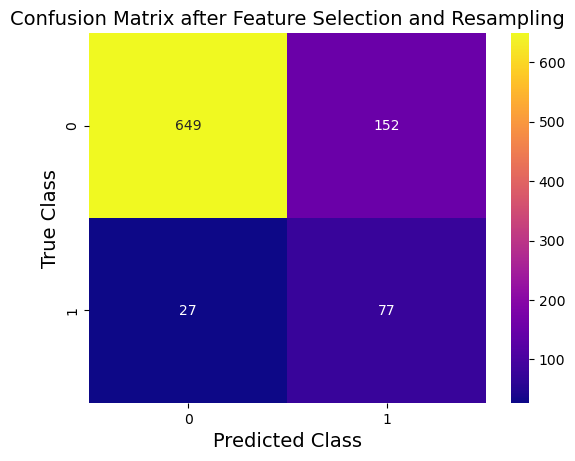

In [30]:
# plot confusion matrix after feature selection using heatmap
ax= sns.heatmap(cm1, cmap = 'plasma', annot = True, fmt= 'd')
plt.xlabel("Predicted Class", fontsize = 14)
plt.ylabel("True Class", fontsize = 14)
plt.title("Confusion Matrix after Feature Selection and Resampling", fontsize = 14)
plt.show()

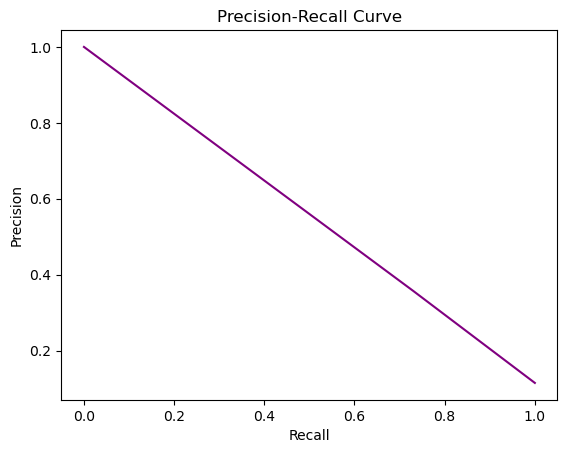

In [31]:
# plot Precision-Recall curve of model before feature selection
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

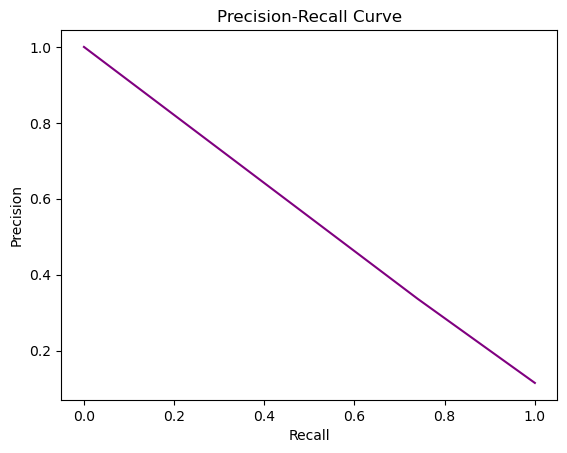

In [32]:
# plot Precision-Recall curve of model after feature selection
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred2)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [33]:
# fit the model with Decision tree classifier before feature selection 
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
classifier.fit(X_trained_oversampled, y_trained_oversampled)

# predict with the created model using test dataset
y_pred_dt = classifier.predict(X_test)

#Evaluate model with metric scores
score = metrics.accuracy_score(y_pred_dt, y_test)
print ('Accuracy Result before feature selection: ', score)
score = metrics.precision_score(y_pred_dt, y_test)
print ('Precision Result before feature selection: ', score)
score = metrics.recall_score(y_pred_dt,y_test)
print ('Recall Result before feature selection: ', score)
score = metrics.f1_score(y_pred_dt, y_test)
print ('F1 Result before feature selection: ', score)

Accuracy Result before feature selection:  0.850828729281768
Precision Result before feature selection:  0.3269230769230769
Recall Result before feature selection:  0.3434343434343434
F1 Result before feature selection:  0.3349753694581281


In [34]:
# fit a model with Decision tree classifier after feature selection
from sklearn.tree import DecisionTreeClassifier
classifier2= DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
classifier2.fit(X_train_cv, y_trained_oversampled)

# predict with the created model using test dataset
y_pred_dt2 = classifier2.predict(X_test_cv)

#Evaluate model with metric scores
score2 = metrics.accuracy_score(y_pred_dt2, y_test)
print ('Accuracy Result after feature selection: ', score2)
score2 = metrics.precision_score(y_pred_dt2, y_test)
print ('Precision Result after feature selection: ', score2)
score2 = metrics.recall_score(y_pred_dt2, y_test)
print ('Recall Result after feature selection: ', score2)
score2 = metrics.f1_score(y_pred_dt2, y_test)
print ('F1 Result after feature selection: ', score2)

Accuracy Result after feature selection:  0.861878453038674
Precision Result after feature selection:  0.3269230769230769
Recall Result after feature selection:  0.38202247191011235
F1 Result after feature selection:  0.35233160621761656


In [35]:
# Train a model with AdaBaoost classifier before feature selection 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adaBoost = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1),n_estimators=100)
adaBoost.fit(X_trained_oversampled, y_trained_oversampled)

# predict with the created model using test dataset
y_pred_ada = adaBoost.predict(X_test)

#Evaluate model with metric scores
score = metrics.accuracy_score(y_pred_ada, y_test)
print ('Accuracy Result before feature selection: ', score)
score = metrics.precision_score(y_pred_ada, y_test)
print ('Precision Result before feature selection: ', score)
score = metrics.recall_score(y_pred_ada,y_test)
print ('Recall Result before feature selection: ', score)
score = metrics.f1_score(y_pred_ada, y_test)
print ('F1 Result before feature selection: ', score)

Accuracy Result before feature selection:  0.8629834254143647
Precision Result before feature selection:  0.7980769230769231
Recall Result before feature selection:  0.44623655913978494
F1 Result before feature selection:  0.5724137931034482


In [36]:
# Train a model with AdaBaoost classifier after feature selection 
adaBoost2 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1),n_estimators=100)
adaBoost2.fit(X_train_cv, y_trained_oversampled)

# predict with the created model using test dataset
y_pred_ada2 = adaBoost2.predict(X_test_cv)

#Evaluate model with metric scores
score = metrics.accuracy_score(y_pred_ada2, y_test)
print ('Accuracy Result before feature selection: ', score)
score = metrics.precision_score(y_pred_ada2, y_test)
print ('Precision Result before feature selection: ', score)
score = metrics.recall_score(y_pred_ada2,y_test)
print ('Recall Result before feature selection: ', score)
score = metrics.f1_score(y_pred_ada2, y_test)
print ('F1 Result before feature selection: ', score)

Accuracy Result before feature selection:  0.8408839779005525
Precision Result before feature selection:  0.7884615384615384
Recall Result before feature selection:  0.4019607843137255
F1 Result before feature selection:  0.5324675324675324


Confusion Matrix
[[698 103]
 [ 21  83]] 


--------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       801
           1       0.45      0.80      0.57       104

    accuracy                           0.86       905
   macro avg       0.71      0.83      0.75       905
weighted avg       0.91      0.86      0.88       905



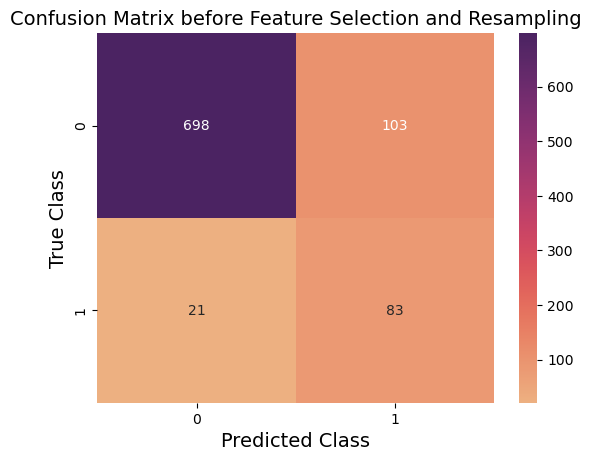

In [37]:
# Evaluate the boosted Decision Tree model before feature selection using confusion metric and visualise
cm2= metrics.confusion_matrix(y_test,y_pred_ada)
print('Confusion Matrix')
print(cm2, '\n\n')
print('--------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred_ada)
print('Classification Report:\n')
print(result)
ax= sns.heatmap(cm2, cmap = 'flare', annot = True, fmt= 'd')
plt.xlabel("Predicted Class", fontsize = 14)
plt.ylabel("True Class", fontsize = 14)
plt.title("Confusion Matrix before Feature Selection and Resampling", fontsize = 14)
plt.show()

Confusion Matrix
[[679 122]
 [ 22  82]] 


--------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       801
           1       0.40      0.79      0.53       104

    accuracy                           0.84       905
   macro avg       0.69      0.82      0.72       905
weighted avg       0.90      0.84      0.86       905



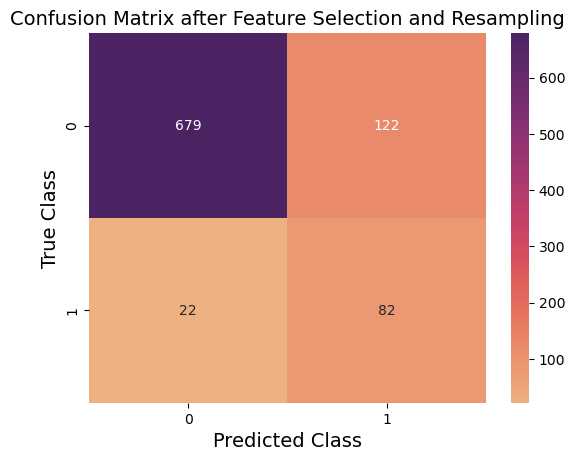

In [38]:
# Evaluate the boosted Decision Tree model after feature selection using confusion metric and visualise
cm2after= metrics.confusion_matrix(y_test,y_pred_ada2)
print('Confusion Matrix')
print(cm2after, '\n\n')
print('--------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred_ada2)
print('Classification Report:\n')
print(result)
ax= sns.heatmap(cm2after, cmap = 'flare', annot = True, fmt= 'd')
plt.xlabel("Predicted Class", fontsize = 14)
plt.ylabel("True Class", fontsize = 14)
plt.title("Confusion Matrix after Feature Selection and Resampling", fontsize = 14)
plt.show()

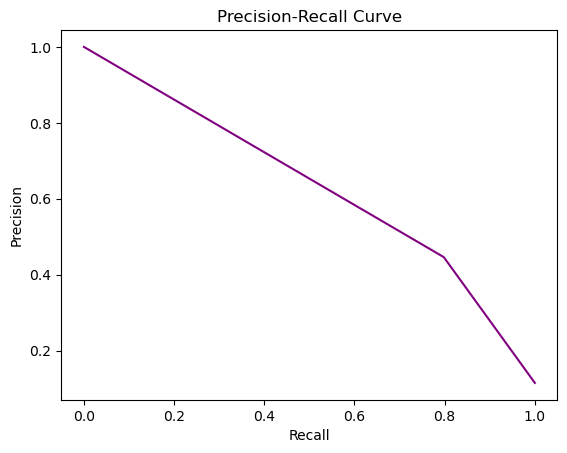

In [39]:
# plot Precision-Recall curve of model before feature selection for boosted Decision tree model
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_ada)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

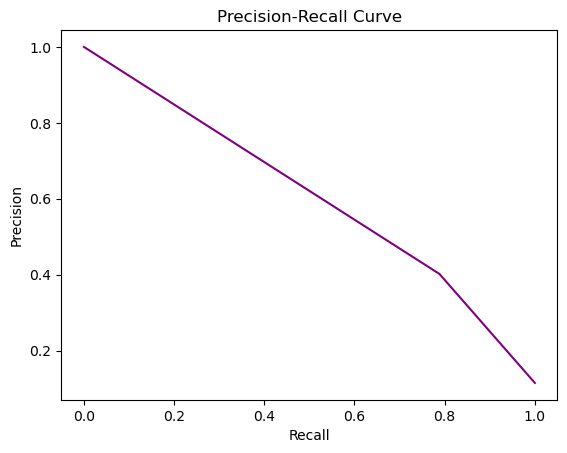

In [40]:
# plot Precision-Recall curve of model after feature selection for boosted Decision tree model
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_ada2)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()